In [305]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [306]:
data=pd.read_csv(r'D:\Python\E-commerce Data for RFM\data.csv',encoding="ISO-8859-1",dtype={'CustomerID':str,'InvoiceNo':str,'StockCode':str})

In [307]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [308]:
data.InvoiceDate.max()

'9/9/2011 9:52'

In [309]:
data.info() #z可以看出，除来少量的产品描述和客户id外，其他信息都完整

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 20.7+ MB


# data distribution


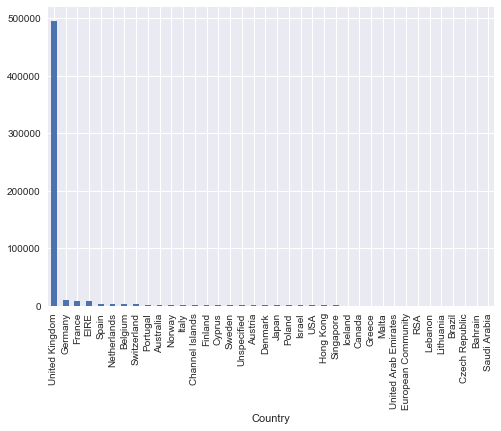

In [310]:
# 国家分布情况，可以看出，UK占据绝对的订单数量
country_group=data.groupby(data['Country'])['Country'].count().sort_values(ascending=False)

country_group.plot(kind='bar')
plt.show()

In [311]:
data=data[data.Country=='United Kingdom']
len(data)

495478

In [312]:
data=data[data.Quantity>0]
data.shape

(486286, 8)

In [313]:
data.drop(data[data.CustomerID.isnull()].index,inplace=True)
data.shape

(354345, 8)

In [314]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [315]:
data1=data[data['InvoiceDate']>='12/9/2010']
data1.shape

(195834, 8)

In [316]:
data.describe()

,Quantity,UnitPrice
count,354345.000000,354345.000000
mean,12.048913,2.963793
std,190.428127,17.862067
min,1.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [317]:
data['money']=data.Quantity*data.UnitPrice

In [318]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,money
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


# RFM ETL

In [319]:
#M 取值
M_df=data.groupby(by='CustomerID',as_index=False).agg({'money':'sum'})
M_df.columns=['ID','M']

In [320]:
M_df.head()

,ID,M
0,12346,77183.60
1,12747,4196.01
2,12748,33719.73
3,12749,4090.88
4,12820,942.34


In [321]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,money
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [322]:
# F取值
F_df=data.groupby(by='CustomerID',as_index=False)['Country'].count()
F_df.columns=['ID','F']
F_df.head()

,ID,F
0,12346,1
1,12747,103
2,12748,4596
3,12749,199
4,12820,59


In [323]:
F_df.index[2] #使用index获取索引的具体值

2

In [324]:
#R 取值
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,money
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [325]:
import time


In [326]:
now=dt.date(2011,12,9)
print(now)

2011-12-09


In [327]:
R_df=data.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max() #把customerid作为列，形成dataframe
R_df.head()

,CustomerID,InvoiceDate
0,12346,1/18/2011 10:01
1,12747,8/22/2011 10:38
2,12748,9/9/2011 13:20
3,12749,8/1/2011 12:50
4,12820,9/26/2011 11:49


In [328]:
from datetime import datetime

In [329]:
now=pd.to_datetime('2011-12-09',format='%Y-%m-%d');
now

Timestamp('2011-12-09 00:00:00')

In [330]:
R_df['InvoiceDate']=pd.to_datetime(R_df['InvoiceDate'])
R_df.InvoiceDate.head()

0   2011-01-18 10:01:00
1   2011-08-22 10:38:00
2   2011-09-09 13:20:00
3   2011-08-01 12:50:00
4   2011-09-26 11:49:00
Name: InvoiceDate, dtype: datetime64[ns]

In [331]:
R_df.head()

,CustomerID,InvoiceDate
0,12346,2011-01-18 10:01:00
1,12747,2011-08-22 10:38:00
2,12748,2011-09-09 13:20:00
3,12749,2011-08-01 12:50:00
4,12820,2011-09-26 11:49:00


In [332]:
R_df['R']=now-R_df['InvoiceDate']

In [333]:
R_df.head()

,CustomerID,InvoiceDate,R
0,12346,2011-01-18 10:01:00,324 days 13:59:00
1,12747,2011-08-22 10:38:00,108 days 13:22:00
2,12748,2011-09-09 13:20:00,90 days 10:40:00
3,12749,2011-08-01 12:50:00,129 days 11:10:00
4,12820,2011-09-26 11:49:00,73 days 12:11:00


In [334]:
R_df.R=R_df.R.astype('timedelta64[D]')+1 #取days并加1

In [335]:
R_df.drop('InvoiceDate',axis=1,inplace=True)

In [336]:
R_df.head()

,CustomerID,R
0,12346,325.0
1,12747,109.0
2,12748,91.0
3,12749,130.0
4,12820,74.0


In [337]:
F_df.head()

,ID,F
0,12346,1
1,12747,103
2,12748,4596
3,12749,199
4,12820,59


In [338]:
M_df.head()

,ID,M
0,12346,77183.60
1,12747,4196.01
2,12748,33719.73
3,12749,4090.88
4,12820,942.34


In [339]:
data1=pd.merge(R_df,F_df,left_on='CustomerID',right_on='ID')
data1.head()

,CustomerID,R,ID,F
0,12346,325.0,12346,1
1,12747,109.0,12747,103
2,12748,91.0,12748,4596
3,12749,130.0,12749,199
4,12820,74.0,12820,59


In [340]:
RFM=pd.merge(data1,M_df,on='ID')
RFM.head()

,CustomerID,R,ID,F,M
0,12346,325.0,12346,1,77183.60
1,12747,109.0,12747,103,4196.01
2,12748,91.0,12748,4596,33719.73
3,12749,130.0,12749,199,4090.88
4,12820,74.0,12820,59,942.34


In [341]:
RFM=RFM[['ID','R','F','M']]
RFM.head()

,ID,R,F,M
0,12346,325.0,1,77183.60
1,12747,109.0,103,4196.01
2,12748,91.0,4596,33719.73
3,12749,130.0,199,4090.88
4,12820,74.0,59,942.34


In [342]:
RFM.set_index('ID',inplace=True)

In [343]:
RFM.head()

,R,F,M
ID,,,
12346,325.0,1,77183.60
12747,109.0,103,4196.01
12748,91.0,4596,33719.73
12749,130.0,199,4090.88
12820,74.0,59,942.34


In [344]:
RFM.describe()

,R,F,M
count,3921.000000,3921.000000,3921.000000
mean,138.710788,90.371079,1863.910113
std,92.726144,217.796155,7481.922217
min,0.000000,1.000000,0.000000
25%,75.000000,17.000000,300.040000
50%,109.000000,41.000000,651.820000
75%,196.000000,99.000000,1575.890000
max,373.000000,7847.000000,259657.300000


# K-Mean Model

In [345]:
from sklearn.cluster import KMeans

In [346]:
# 分为8类进行描述,困惑：应该需要进行标准化，以及对值进行正态性等检验
clf=KMeans(n_clusters=8,random_state=9)
clf=clf.fit(RFM)

In [347]:
clf.cluster_centers_

array([[  1.06428826e+02,   2.23827402e+02,   3.77396895e+03],
       [  1.70333333e+02,   4.02000000e+02,   8.30902733e+04],
       [  7.20000000e+01,   4.31000000e+02,   2.59657300e+05],
       [  1.05176471e+02,   9.65117647e+02,   3.34845671e+04],
       [  1.45807218e+02,   5.04524985e+01,   6.69034708e+02],
       [  1.50000000e+02,   1.70000000e+02,   1.81511645e+05],
       [  9.26428571e+01,   4.00250000e+02,   1.17792057e+04],
       [  9.12000000e+01,   1.29820000e+03,   5.87768150e+04]])

In [348]:
RFM['label']=clf.labels_

In [349]:
RFM.head()

,R,F,M,label
ID,,,,
12346,325.0,1,77183.60,1
12747,109.0,103,4196.01,0
12748,91.0,4596,33719.73,3
12749,130.0,199,4090.88,0
12820,74.0,59,942.34,4


In [350]:
RFM.label.value_counts()

4    3244
0     560
6      84
3      17
7      10
1       3
5       2
2       1
Name: label, dtype: int64

# 利用标准化进行处理 

In [352]:
RFM.R.max()

373.0

In [353]:
RFM['R_std']=(RFM['R']-RFM['R'].min())/(RFM['R'].max()-RFM['R'].min())

In [354]:
RFM['M_std']=(RFM['M']-RFM['M'].min())/(RFM['M'].max()-RFM['M'].min())

In [355]:
RFM['F_std']=(RFM['F']-RFM['F'].min())/(RFM['F'].max()-RFM['F'].min())


In [356]:
RFM.head()

,R,F,M,label,R_std,M_std,F_std
ID,,,,,,,
12346,325.0,1,77183.60,1,0.871314,0.297252,0.000000
12747,109.0,103,4196.01,0,0.292225,0.016160,0.013000
12748,91.0,4596,33719.73,3,0.243968,0.129862,0.585649
12749,130.0,199,4090.88,0,0.348525,0.015755,0.025236
12820,74.0,59,942.34,4,0.198391,0.003629,0.007392


In [362]:
clf1=KMeans(n_clusters=8)
clf1=clf1.fit(RFM[['R_std','M_std','F_std']])
RFM['label_std']=clf1.labels_
RFM.head()

,R,F,M,label,R_std,M_std,F_std,label_std
ID,,,,,,,,
12346,325.0,1,77183.60,1,0.871314,0.297252,0.000000,2
12747,109.0,103,4196.01,0,0.292225,0.016160,0.013000,4
12748,91.0,4596,33719.73,3,0.243968,0.129862,0.585649,7
12749,130.0,199,4090.88,0,0.348525,0.015755,0.025236,4
12820,74.0,59,942.34,4,0.198391,0.003629,0.007392,1


In [363]:
RFM.label_std.value_counts()

1    1288
4     601
3     555
6     476
0     395
5     376
2     217
7      13
Name: label_std, dtype: int64

In [361]:
RFM.to_csv(r'D:\RFM.csv')